# RNN and Transformer Lab
---

## LSTM Lab

In [ ]:
from tensorflow.keras.datasets import reuters
import numpy as np

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
print(type((X_train, y_train)))

category = np.max(y_train) + 1
print('# of Category:',category)
print('# of news for training:', len(X_train))
print('# of news for testing:', len(X_test))
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
<class 'tuple'>
# of Category: 46
# of news for training: 8982
# of news for testing: 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         100000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 46)                4646      
                                                                 
Total params: 185046 (722.84 KB)
Trainable params: 185046 (722.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
450/450 [==============================] - 40s 81ms/step - loss: 2.2252 - accuracy: 0.4318 - val_loss: 1.9276 - val_accuracy: 0.4884
Epoch 2/20
450/450 [==============================] - 38s 85ms/step - loss: 1.7924 - accuracy: 0.5410 - val_loss: 1.6912 - val_accurac

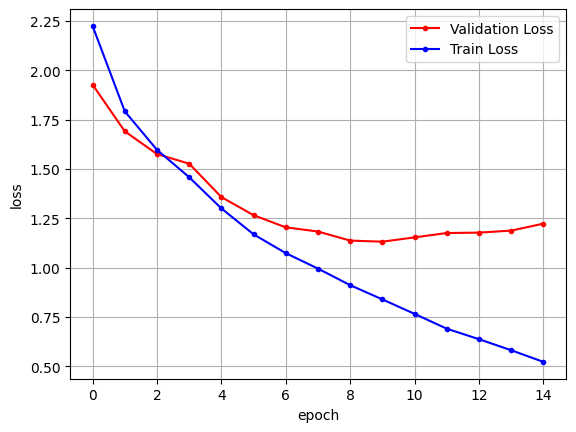

In [4]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence

import numpy as np
import matplotlib.pyplot as plt

#data preprocessing
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)
X_train = sequence.pad_sequences(X_train, 100)
X_test = sequence.pad_sequences(X_test, 100)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# model structure
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))
model.summary()

# model train
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'precision', 'recall'])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(X_train, y_train, batch_size = 20, epochs = 20, validation_data = (X_test, y_test), callbacks = [early_stopping_callback])
print('\n Test Accuracy:', model.evaluate(X_test, y_test)[1])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', color = 'red', label = 'Validation Loss')
plt.plot(x_len, y_loss, marker = '.', color = 'blue', label = 'Train Loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


## LSTM+CNN Lab

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# data preprocessing
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)

X_train = pad_sequences(X_train, 500)
X_test = pad_sequences(X_test, 500)

# model structure
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(4))
model.add(LSTM(200))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.summary()

# model train
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(X_train, y_train, batch_size = 40, epochs = 20, validation_split = 0.25, callbacks = [early_stopping_callback])
print('\n Test Accuracy by Choi: ', model.evaluate(X_test, y_test)[1])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', color = 'red', label = 'Validation Loss')
plt.plot(x_len, y_loss, marker = '.', color = 'blue', label = 'Train Loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

model.summary()

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
469/469 [==============================] - 226s 472ms/step - loss: 0.4170 - accuracy: 0.7935 - val_loss: 0.3022 - val_accuracy: 0.8779
Epoch 2/20
469/469 [==============================] - 209s 446ms/step - loss: 0.2441 - accuracy: 0.9038 - val_loss: 0.2726 - val_accuracy: 0.8877
Epoch 3/20
469/469 [==============================] - 211s 449ms/step - loss: 0.1985 - accuracy: 0.9251 - val_loss: 0.2650 - val_accuracy: 0.8928
Epoch 4/20
469/469 [==============================] - 209s 447ms/step - loss: 0.1540 - accuracy: 0.9436 - val_loss: 0.2910 - val_accuracy: 0.8883
Epoch 5/20
469/469 [==============================] - 180s 383ms/step - loss: 0.1233 - accuracy: 0.9563 - val_loss: 0.3310 - val_accuracy: 0.8899
Epoch 6/20
469/469 [==============================] - 174s 370ms/step - loss: 0.1002 - accuracy: 0.9645 - val_loss: 0.3149 - val_accuracy: 0.8920
Epoch 7/20
469/469 [==============================] - 176s 